<a href="https://colab.research.google.com/github/vedmara/project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Background



 Indication: Low Back Pain ( LBP)



 Parallel, double blind,Multicentric Phase III Clinical Trial ( 4 centers)



 Number of treatments: 03



 Treatments: Test, Reference and Placebo



 Sample Size: n=780



 Visits: Day 1( V1), Day 3( V2) and Day 7(V3)



Primary End Point: Visual Analogue Scale (VAS)

Scale: 0-100 mm

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

aedata=pd.read_csv("/content/drive/MyDrive/Project/AE DATA.csv")
aedata.head()
#aedata.info()

,Patient_ID,AE,AE_REL,AE_SEVERITY
0,PID/001,NONE,NaN,NaN
1,PID/002,NONE,NaN,NaN
2,PID/003,NONE,NaN,NaN
3,PID/004,NONE,NaN,NaN
4,PID/005,NONE,NaN,NaN


In [3]:
baselinedata=pd.read_csv("/content/drive/MyDrive/Project/Baseline Characteristics.csv")
baselinedata.head()
baselinedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Patient_ID  780 non-null    object
 1   Work        780 non-null    object
 2   Surgery_1Y  780 non-null    object
dtypes: object(3)
memory usage: 18.4+ KB


In [4]:
demografdata=pd.read_csv("/content/drive/MyDrive/Project/Demographics.csv")
demografdata.head()
demografdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Patient_ID  780 non-null    object
 1   Age         780 non-null    int64 
 2   Gender      780 non-null    object
dtypes: int64(1), object(2)
memory usage: 18.4+ KB


In [5]:
globaldata=pd.read_csv("/content/drive/MyDrive/Project/Global Assessment.csv")
globaldata.head()
#globaldata.info()

,Patient_ID,PGA
0,PID/001,2
1,PID/002,4
2,PID/003,4
3,PID/004,4
4,PID/005,1


In [6]:
randomazedata=pd.read_csv("/content/drive/MyDrive/Project/Randomization.csv")
randomazedata.head()
#randomazedata.info()

,Patient_ID,Treatment,Center
0,PID/001,PLACEBO,C1
1,PID/002,TEST,C3
2,PID/003,TEST,C2
3,PID/004,TEST,C1
4,PID/005,PLACEBO,C1


In [7]:
studydata=pd.read_csv("/content/drive/MyDrive/Project/Study Populations.csv")
studydata.head()
#studydata.info()

,Patient_ID,ITT,PP
0,PID/001,YES,YES
1,PID/002,YES,YES
2,PID/003,YES,YES
3,PID/004,YES,YES
4,PID/005,YES,YES


In [4]:
vasdata=pd.read_csv("/content/drive/MyDrive/Project/VAS Data.csv")
vasdata.head()
vasdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Patient_ID  5460 non-null   object
 1   Day         5460 non-null   object
 2   VAS         5460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 128.1+ KB


In [9]:
vitaldata=pd.read_csv("/content/drive/MyDrive/Project/Vital Signs.csv")
vitaldata.head()
vitaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Patient_ID                       780 non-null    object
 1   PR                               780 non-null    int64 
 2   Pulse rate (beats/min)           780 non-null    object
 3   RR                               780 non-null    int64 
 4   Respiratory rate (breaths/min)   780 non-null    object
 5   SBP                              780 non-null    int64 
 6   Systolic blood pressure (mmHg)   780 non-null    object
 7   DBP                              780 non-null    int64 
 8   Diastolic blood pressure (mmHg)  780 non-null    object
dtypes: int64(4), object(5)
memory usage: 55.0+ KB


In [10]:
# Merge datasets
merged_data = pd.merge(randomazedata, studydata, on='Patient_ID', how='inner')

In [11]:
merged_data = pd.merge(merged_data,demografdata, on='Patient_ID', how='inner')

In [12]:
merged_data = pd.merge(merged_data,baselinedata, on='Patient_ID', how='inner')

In [13]:
merged_data = pd.merge(merged_data,vitaldata, on='Patient_ID', how='inner')

In [14]:
merged_data.head()

,Patient_ID,Treatment,Center,ITT,PP,Age,Gender,Work,Surgery_1Y,PR,Pulse rate (beats/min),RR,Respiratory rate (breaths/min),SBP,Systolic blood pressure (mmHg),DBP,Diastolic blood pressure (mmHg)
0,PID/001,PLACEBO,C1,YES,YES,24,Female,FT,NO,77,BEATS/MIN,16,BREATHS/MIN,110,MMHG,80,MMHG
1,PID/002,TEST,C3,YES,YES,25,Male,FT,NO,74,BEATS/MIN,17,BREATHS/MIN,122,MMHG,70,MMHG
2,PID/003,TEST,C2,YES,YES,22,Female,FT,NO,86,BEATS/MIN,14,BREATHS/MIN,120,MMHG,80,MMHG
3,PID/004,TEST,C1,YES,YES,54,Female,FT,NO,84,BEATS/MIN,16,BREATHS/MIN,124,MMHG,82,MMHG
4,PID/005,PLACEBO,C1,YES,YES,57,Male,FT,NO,84,BEATS/MIN,15,BREATHS/MIN,110,MMHG,80,MMHG


In [15]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Patient_ID                       780 non-null    object
 1   Treatment                        780 non-null    object
 2   Center                           780 non-null    object
 3   ITT                              780 non-null    object
 4   PP                               780 non-null    object
 5   Age                              780 non-null    int64 
 6   Gender                           780 non-null    object
 7   Work                             780 non-null    object
 8   Surgery_1Y                       780 non-null    object
 9   PR                               780 non-null    int64 
 10  Pulse rate (beats/min)           780 non-null    object
 11  RR                               780 non-null    int64 
 12  Respiratory rate (breaths/min)   780

In [16]:
# Summary table of demographics by treatment groups for each center
demographics_summary = merged_data.groupby(['Center', 'Treatment']).agg({
    'Age': ['mean', 'std'],
    'Gender': lambda x: x.mode()[0],  # Most frequent gender
}).reset_index()

In [17]:
print("Demographics Summary:")
print(demographics_summary)

Demographics Summary:
   Center Treatment        Age              Gender
                          mean        std <lambda>
0      C1   PLACEBO  39.884058  12.985893   Female
1      C1       REF  41.000000  11.207928     Male
2      C1      TEST  35.942308  12.054474   Female
3      C2   PLACEBO  38.721311  12.248988     Male
4      C2       REF  39.163636  12.425725   Female
5      C2      TEST  41.640000  13.519395     Male
6      C3   PLACEBO  40.840000  12.092034     Male
7      C3       REF  39.657143  11.968419   Female
8      C3      TEST  38.981481  13.112706     Male
9      C4   PLACEBO  41.000000  12.216482     Male
10     C4       REF  39.925373  13.008521     Male
11     C4      TEST  37.287879  11.863020   Female


In [18]:
# Summary table of baseline characteristics by treatment groups for each center
baseline_summary = merged_data.groupby(['Center', 'Treatment']).agg({
    'Work': lambda x: x.mode()[0],  # Most frequent work status
    'Surgery_1Y': lambda x: x.mode()[0],  # Most frequent surgery status
}).reset_index()

In [19]:
print("\nBaseline Characteristics Summary:")
print(baseline_summary)


Baseline Characteristics Summary:
   Center Treatment Work Surgery_1Y
0      C1   PLACEBO   FT         NO
1      C1       REF   FT         NO
2      C1      TEST   FT         NO
3      C2   PLACEBO   FT         NO
4      C2       REF   FT         NO
5      C2      TEST   FT         NO
6      C3   PLACEBO   FT         NO
7      C3       REF   FT         NO
8      C3      TEST   FT         NO
9      C4   PLACEBO   FT         NO
10     C4       REF   FT         NO
11     C4      TEST   FT         NO


In [20]:
# Summary table of vital signs by treatment groups for each center
vital_summary = merged_data.groupby(['Center', 'Treatment']).agg({
    'PR': ['mean', 'std'],
    'RR': ['mean', 'std'],
    'SBP': ['mean', 'std'],
    'DBP': ['mean', 'std']
}).reset_index()

In [21]:
print("\nVital Signs Summary:")
print(vital_summary)


Vital Signs Summary:
   Center Treatment         PR                   RR                   SBP  \
                          mean       std       mean       std        mean   
0      C1   PLACEBO  80.057971  5.384848  16.521739  1.922075  119.130435   
1      C1       REF  80.000000  4.290893  16.289855  2.058708  118.927536   
2      C1      TEST  79.769231  4.976870  15.961538  1.342540  119.615385   
3      C2   PLACEBO  79.409836  4.529080  16.081967  1.744468  119.114754   
4      C2       REF  79.527273  5.006864  16.072727  1.537850  119.745455   
5      C2      TEST  80.026667  5.462336  16.066667  1.926580  118.773333   
6      C3   PLACEBO  79.506667  4.998306  16.253333  1.724962  119.173333   
7      C3       REF  78.942857  4.913412  16.085714  1.369892  117.942857   
8      C3      TEST  79.777778  4.936069  16.407407  1.848186  120.444444   
9      C4   PLACEBO  79.582090  4.472642  16.059701  1.475873  118.626866   
10     C4       REF  78.746269  5.185479  15.597015  1

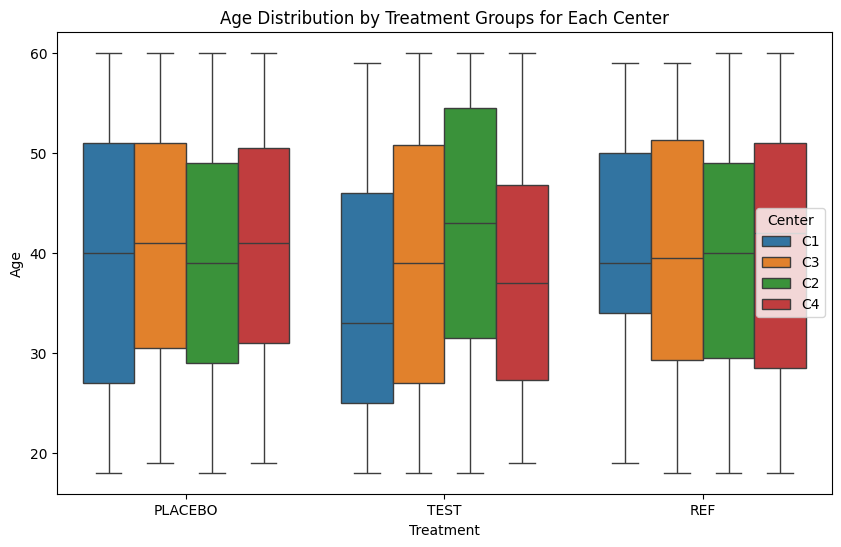

In [22]:
# Visualization

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='Treatment', y='Age', hue='Center')
plt.title('Age Distribution by Treatment Groups for Each Center')
plt.xlabel('Treatment')
plt.ylabel('Age')
plt.legend(title='Center')
plt.show()

**Part II**

In [23]:
merge_data = pd.merge(randomazedata, vasdata, on='Patient_ID', how='inner')
merge_data
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Patient_ID  5460 non-null   object
 1   Treatment   5460 non-null   object
 2   Center      5460 non-null   object
 3   Day         5460 non-null   object
 4   VAS         5460 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 213.4+ KB


In [24]:
summary_stats = merge_data.groupby(['Treatment', 'Day']).agg({
    'VAS': ['count', 'mean', 'std', 'median', 'min', 'max']
}).reset_index()
print(summary_stats)

   Treatment   Day   VAS                                     
                   count       mean        std median min max
0    PLACEBO  DAY1   272  64.555147  14.558594   66.0  22  91
1    PLACEBO  DAY2   272  57.363971  14.177703   58.0  18  86
2    PLACEBO  DAY3   272  49.022059  16.324643   51.0   0  77
3    PLACEBO  DAY4   272  41.106618  15.079116   45.0   0  68
4    PLACEBO  DAY5   272  35.216912  15.206840   36.5   0  60
5    PLACEBO  DAY6   272  31.356618  17.269986   29.0   0  68
6    PLACEBO  DAY7   272  28.000000  18.209523   26.0   0  69
7        REF  DAY1   261  63.406130  16.751458   72.0  16  87
8        REF  DAY2   261  46.735632  19.881259   48.0   0  81
9        REF  DAY3   261  29.593870  21.475474   29.0   0  77
10       REF  DAY4   261  21.823755  17.683314   24.0   0  66
11       REF  DAY5   261  17.567050  15.756083   19.0   0  65
12       REF  DAY6   261  13.337165  14.629571    4.0   0  64
13       REF  DAY7   261  11.111111  13.987051    3.0   0  62
14      

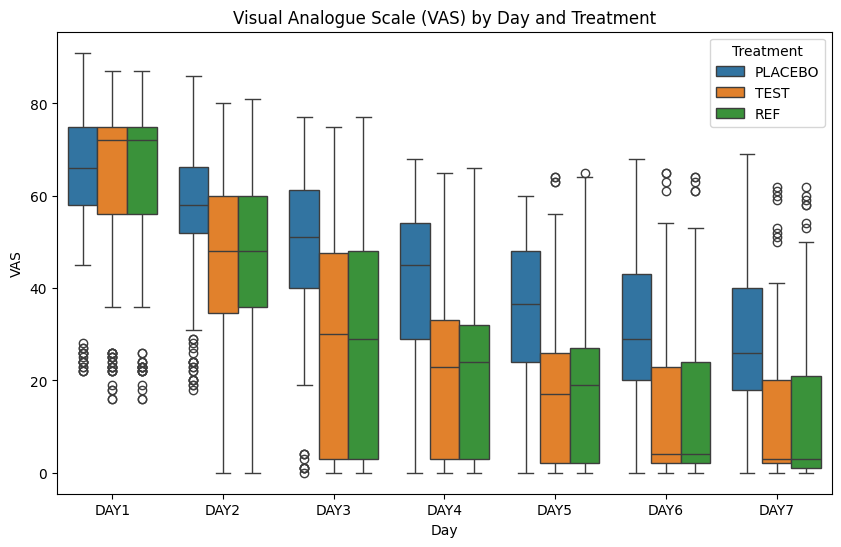

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merge_data, x='Day', y='VAS', hue='Treatment')
plt.title('Visual Analogue Scale (VAS) by Day and Treatment')
plt.xlabel('Day')
plt.ylabel('VAS')
plt.legend(title='Treatment')
plt.show()

In [8]:
merging_data = pd.merge(baselinedata, vasdata, on='Patient_ID', how='inner')
merging_data
#merging_data.info()

,Patient_ID,Work,Surgery_1Y,Day,VAS
0,PID/001,FT,NO,DAY1,72
1,PID/001,FT,NO,DAY2,70
2,PID/001,FT,NO,DAY3,69
3,PID/001,FT,NO,DAY4,56
4,PID/001,FT,NO,DAY5,56
...,...,...,...,...,...
5455,PID/780,FT,NO,DAY3,21
5456,PID/780,FT,NO,DAY4,20
5457,PID/780,FT,NO,DAY5,22
5458,PID/780,FT,NO,DAY6,17
